### Бинарний класифікатор. Дорожні знаки. Домашня робота.

### Binary classifier. Road Signs. Homework.

In [1]:
import os
import cv2
from time import time
import numpy as np
import tensorflow as tf
# from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

print(tf.config.list_physical_devices())
np.random.seed(2023)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Завантаження даних

### Loading data

In [2]:
folder = '../data/subset_homework'

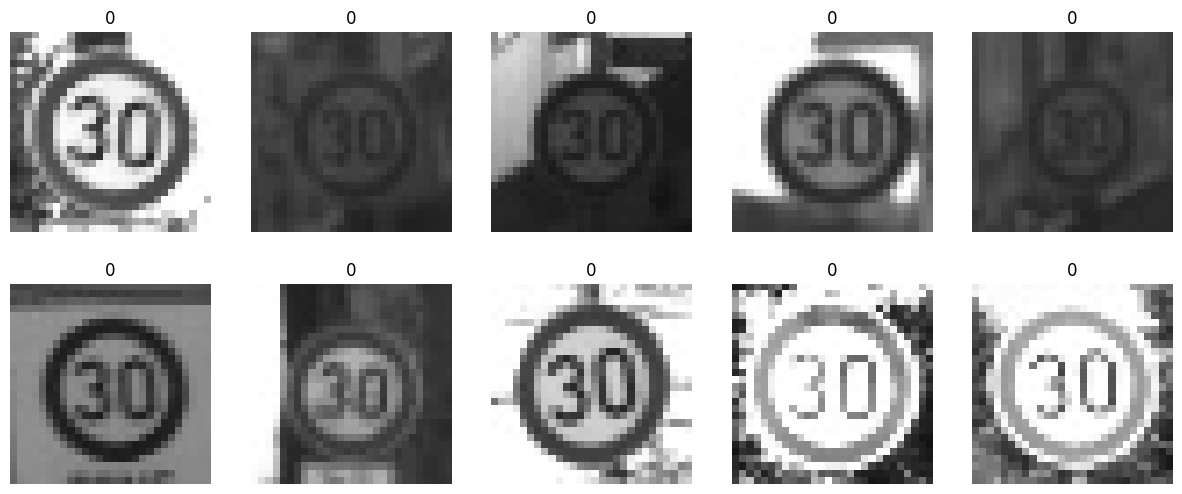

In [3]:
# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

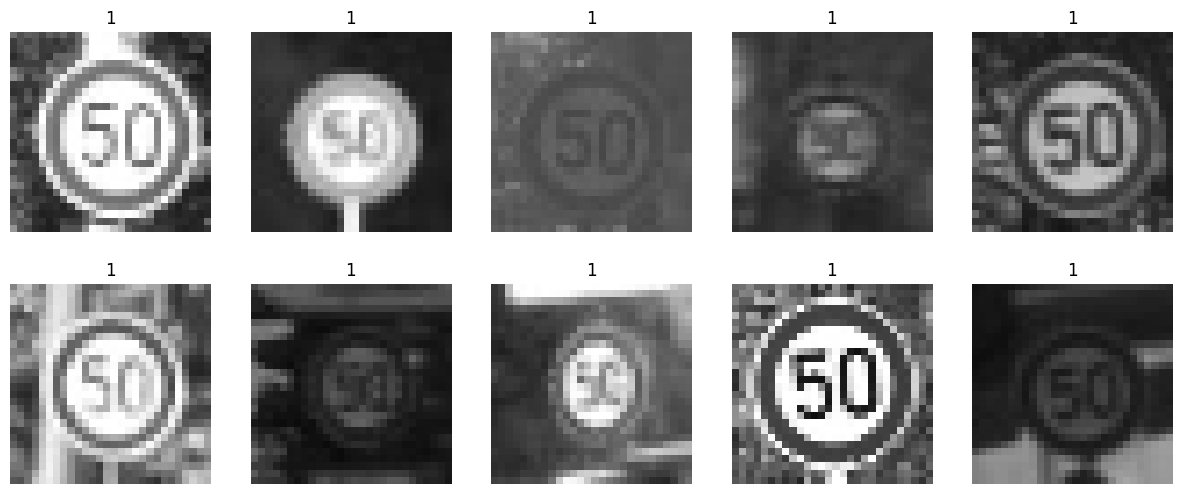

In [4]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [5]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


#### Підготовка даних для тренування
Об'єднати дані в один масив, також об'єднати анотації. Перемішати дані для нормального навання.

#### Preparation of training data
Combine data into one array, also combine annotations. Shuffle the data for normal navigation.

In [6]:
# Put both classes together and shuffle the data
images = np.array(images_0 + images_1)
labels = np.array(labels_0 + labels_1)
indixes = tf.random.shuffle(range(len(labels)), seed=18).numpy()
# print(indixes)
images = images[indixes]
labels = labels[indixes]
images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


Розташування пікселів малюнків у одновимірний масив.

Arrangement of picture pixels in a one-dimensional array.

In [7]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.014110565185546875


Перед тренуванням потрібно пересвідчитися, що дані сформовані вірно

Before training, you need to make sure that the data is formed correctly

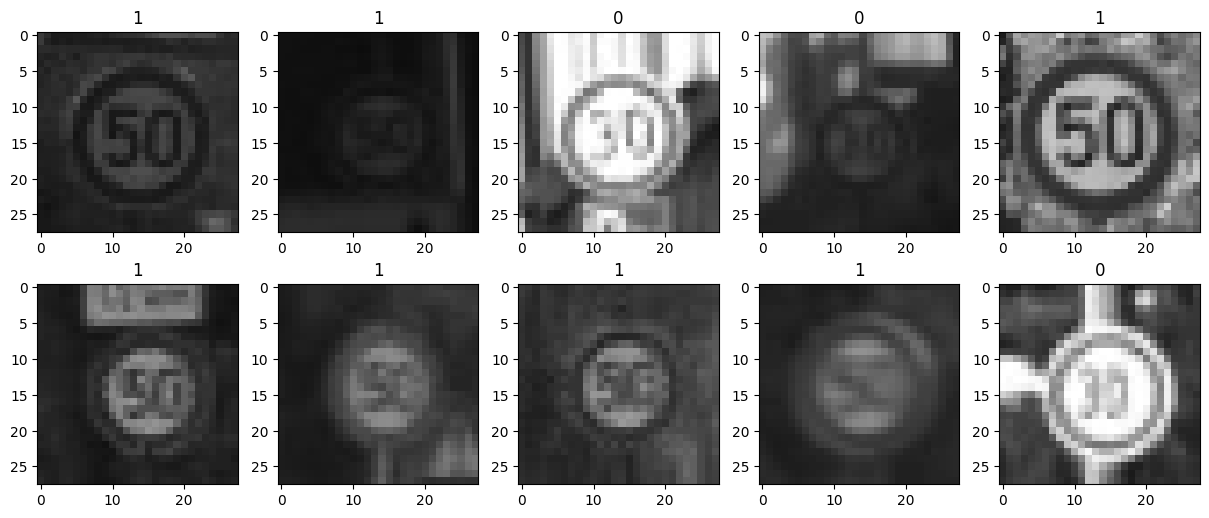

In [8]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

#### Побудова нейронної мережі

#### Construction of a neural network

The following netowork will consist of only one single neuron. It is a very tiny network (not even a network, strictly speaking :-) ) and yet it can be quite powerful.

In [9]:
inputs = tf.keras.layers.Input(shape=(pixels.shape[1]), name='Input_image')
outputs = tf.keras.layers.Dense(1, activation="linear", name='One_perceptron')(inputs)
model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_image (InputLayer)    [(None, 784)]             0         
                                                                 
 One_perceptron (Dense)      (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


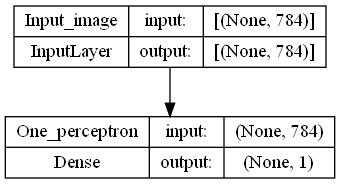

In [10]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

Компіляція моделі будує схеми розрахування градієнтів та їх використання для зміни коефіцієнтів.

Compilation of the model builds schemes for calculating gradients and using them to change coefficients.

In [11]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')

Нехай тренується...

In [12]:
history = model.fit(pixels, labels, epochs=30, batch_size=64)

Epoch 1/30
280/280 [==============================] - 1s 2ms/step - loss: 0.2809
Epoch 2/30
280/280 [==============================] - 1s 2ms/step - loss: 0.1856
Epoch 3/30
280/280 [==============================] - 1s 2ms/step - loss: 0.1471
Epoch 4/30
280/280 [==============================] - 1s 2ms/step - loss: 0.1270
Epoch 5/30
280/280 [==============================] - 1s 2ms/step - loss: 0.1175
Epoch 6/30
280/280 [==============================] - 1s 2ms/step - loss: 0.1113
Epoch 7/30
280/280 [==============================] - 1s 2ms/step - loss: 0.0986
Epoch 8/30
280/280 [==============================] - 1s 2ms/step - loss: 0.0932
Epoch 9/30
280/280 [==============================] - 1s 3ms/step - loss: 0.0943
Epoch 10/30
280/280 [==============================] - 1s 3ms/step - loss: 0.0917
Epoch 11/30
280/280 [==============================] - 1s 2ms/step - loss: 0.0885
Epoch 12/30
280/280 [==============================] - 1s 2ms/step - loss: 0.0879
Epoch 13/30
280/280 [====

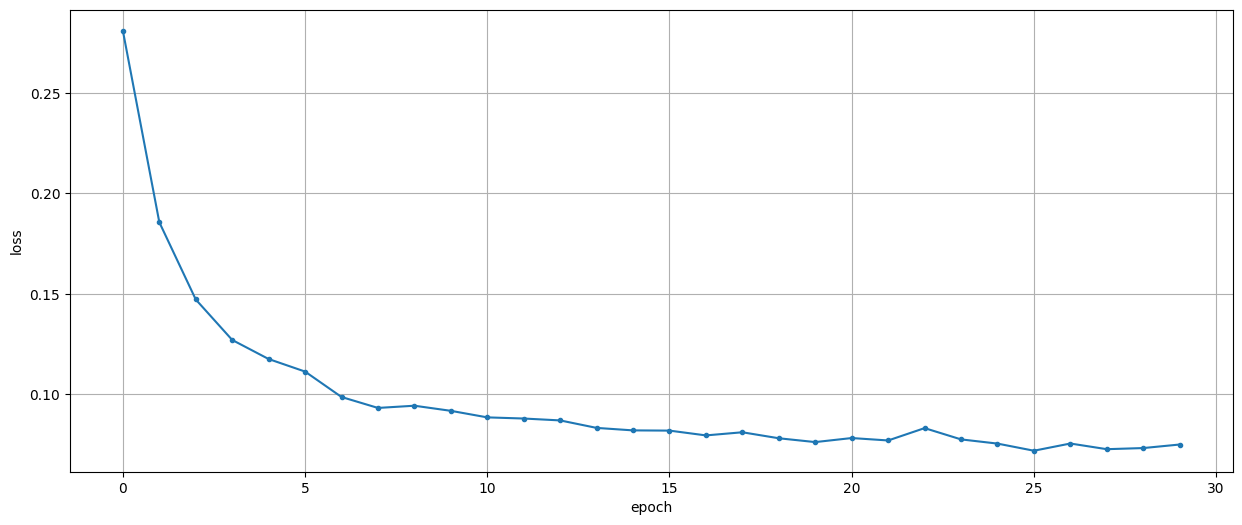

In [13]:
epochs = range(len(history.history['loss']))
plt.plot(epochs, history.history['loss'], '.-', scaley='log'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')
plt.show()

Останні кроки навіть погіршили ситуацію. Більше тренувати, мабуть, сенсу не має.

The latest steps have even worsened the situation. It probably makes no sense to train more.

Тепер можна подивитися на значення коефіцієнтів. Але що це дає в такому вигляді?

Now you can look at the values of the coefficients. But what does it give in this form?

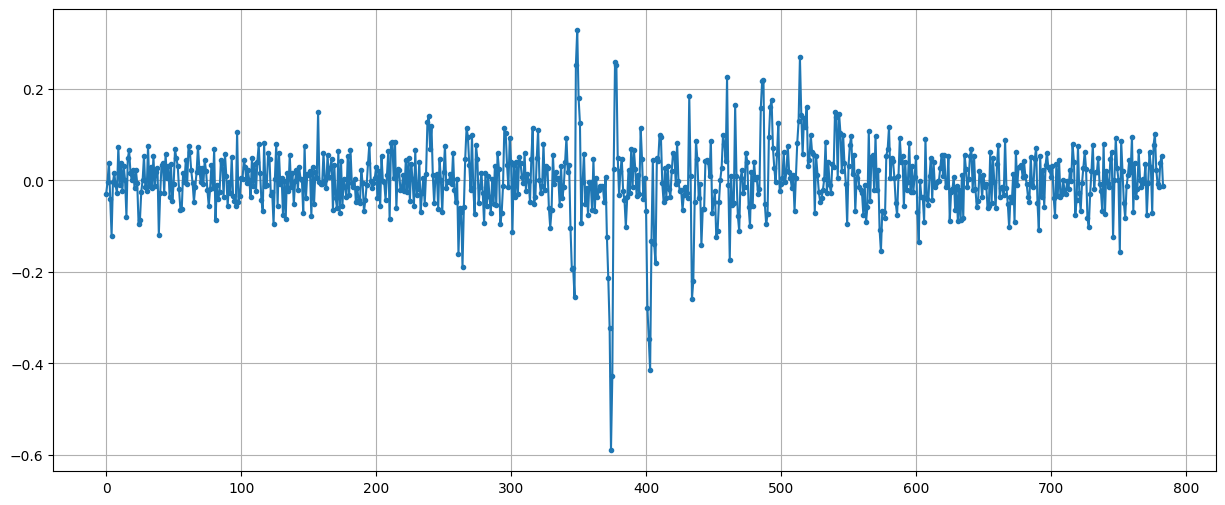

[0.5366419] [0.5366419]


In [14]:
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
plt.show()
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

Мабуть малюнком буде краще:

Perhaps a picture would be better:

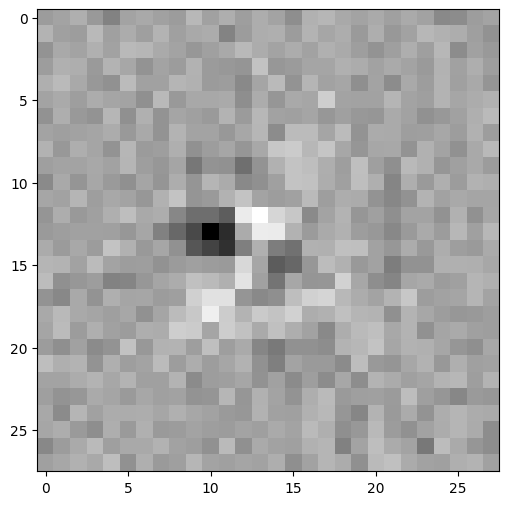

In [15]:
layers_weights = model.layers[1].weights[0].numpy()
layers_weights.shape = (28, 28)
plt.imshow(layers_weights, cmap='gray')
plt.show()

Темним показано пікселі, які своєю підвищеною яскравістю "голосують" за 0, а світлі - за 1.

The dark ones show pixels that "vote" for 0 with their increased brightness, and the light ones - for 1.

#### Перевірка якості навчання

Для цього перевіримо на окремих кадрах. Зробимо перелік помилок.

#### Checking the quality of education

To do this, we will check on individual frames. Let's make a list of errors.

1/1 [==============================] - 0s 51ms/step
[[0.45464528]] 0


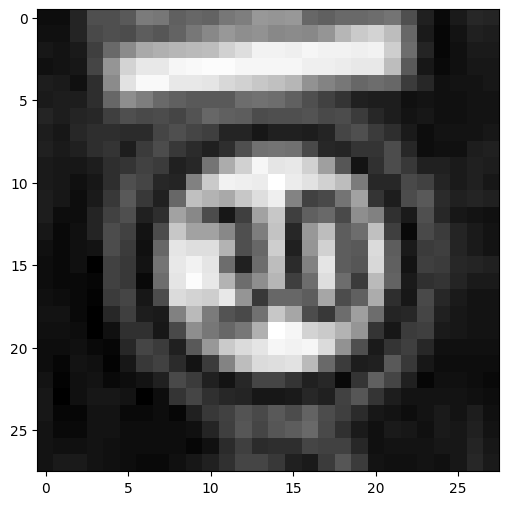

In [16]:
# Працює з випадковим кадром, запускайте кілька разів
idx = np.random.randint(0, len(labels))
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])
img = pixels[idx, ...]
img.shape = (28, 28)
plt.imshow(img, cmap='gray')
plt.show()

In [17]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 [==============================] - 0s 2ms/step


In [18]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

acc1 = correct/len(labels)

print('Accuracy', acc1)

Accuracy 0.9664429530201343


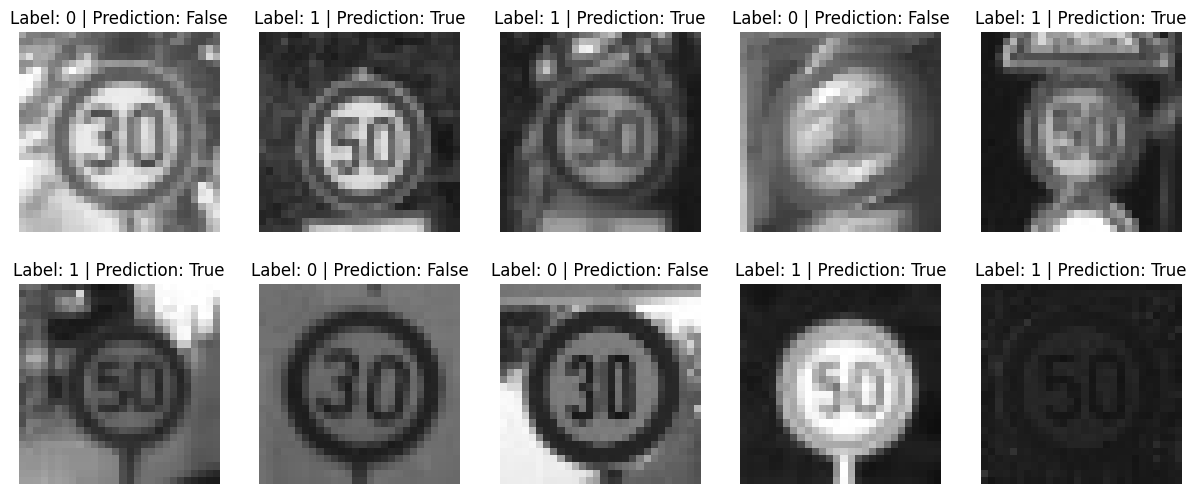

In [19]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)

Зробимо пошук до першої момилки

Let's search for the first word

True 0


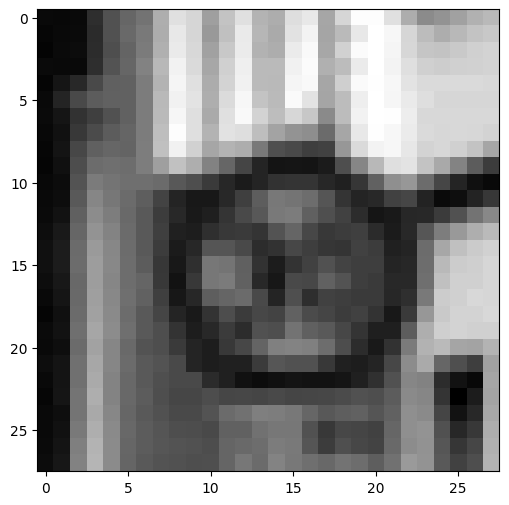

In [20]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1
    else:
        err_num = correct
        break

print(predictions[err_num], labels[err_num])
img = pixels[err_num, ...]
img.shape = (28, 28)
plt.imshow(img, cmap='gray')
plt.show()

### *** Додамо ще нейронів! ***

Але тут потрібно буде додати ще один шар з одним нейроном для комбінування результатів у один:

### *** Let's add more neurons! ***

But here you will need to add another layer with one neuron to combine the results into one:

In [21]:
inputs = tf.keras.layers.Input(shape=(pixels.shape[1]), name='Input_image')
outputs1 = tf.keras.layers.Dense(3, activation="relu", name='Two_perceptrons')(inputs)
outputs2 = tf.keras.layers.Dense(1, activation="relu", name='Out_perceptron')(outputs1)
model = tf.keras.Model(inputs, outputs2)
model.summary()
tf.keras.utils.plot_model(model, to_file="model_2.png", show_shapes=True, show_layer_names=True)
model.compile(optimizer ='adam', loss = 'mean_squared_error')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_image (InputLayer)    [(None, 784)]             0         
                                                                 
 Two_perceptrons (Dense)     (None, 3)                 2355      
                                                                 
 Out_perceptron (Dense)      (None, 1)                 4         
                                                                 
Total params: 2,359
Trainable params: 2,359
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
70/70 [==============================] - 1s 4ms/step - loss: 0.3206
Epoch 2/30
70/70 [==============================] - 0s 4ms/step - loss: 0.2382
Epoch 3/30
70/70 [==============================] - 0s 4ms/step - loss: 0.2026
Epoch 4/30
70/70 [==============================] - 0s 4ms/step - loss: 0.1824
Epoch 5/30
70/70 [==============================] - 0s 4ms/step - loss: 0.1553
Epoch 6/30
70/70 [==============================] - 0s 4ms/step - loss: 0.1392
Epoch 7/30
70/70 [==============================] - 0s 4ms/step - loss: 0.1253
Epoch 8/30
70/70 [==============================] - 0s 4ms/step - loss: 0.1157
Epoch 9/30
70/70 [==============================] - 0s 4ms/step - loss: 0.1067
Epoch 10/30
70/70 [==============================] - 0s 4ms/step - loss: 0.1002
Epoch 11/30
70/70 [==============================] - 0s 4ms/step - loss: 0.0950
Epoch 12/30
70/70 [==============================] - 0s 4ms/step - loss: 0.0927
Epoch 13/30
70/70 [==============================

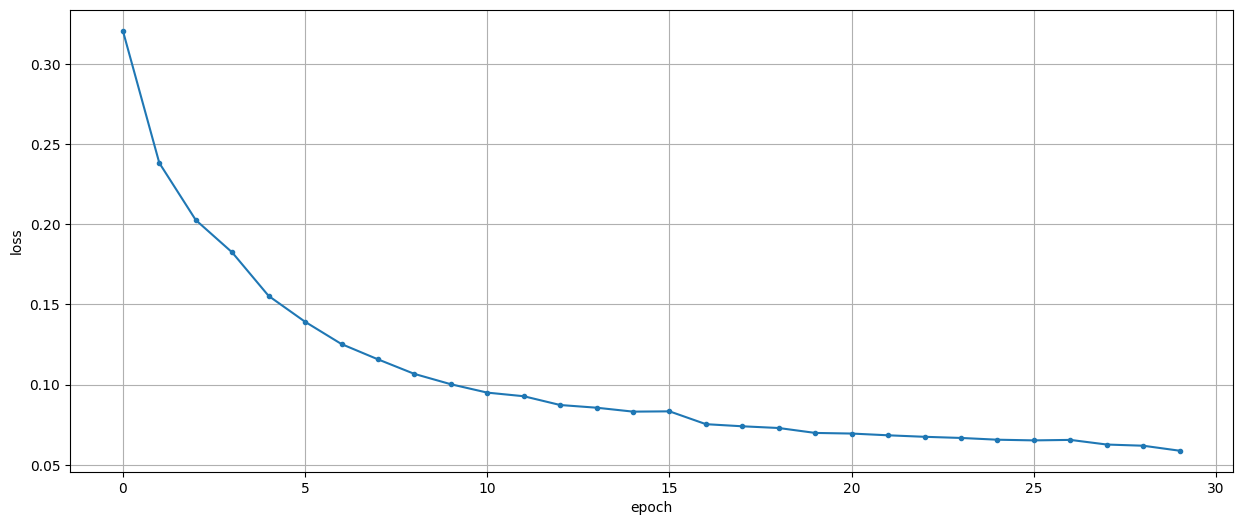

In [22]:
history = model.fit(pixels, labels, epochs=30, batch_size=64)
epochs = range(len(history.history['loss']))
plt.plot(epochs, history.history['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')
plt.show()

In [23]:
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1
acc2 = correct/len(labels)
print('Accuracy', acc2)

140/140 [==============================] - 0s 2ms/step
Accuracy 0.9277404921700224


In [24]:
print(acc1, acc2)

0.9664429530201343 0.9277404921700224


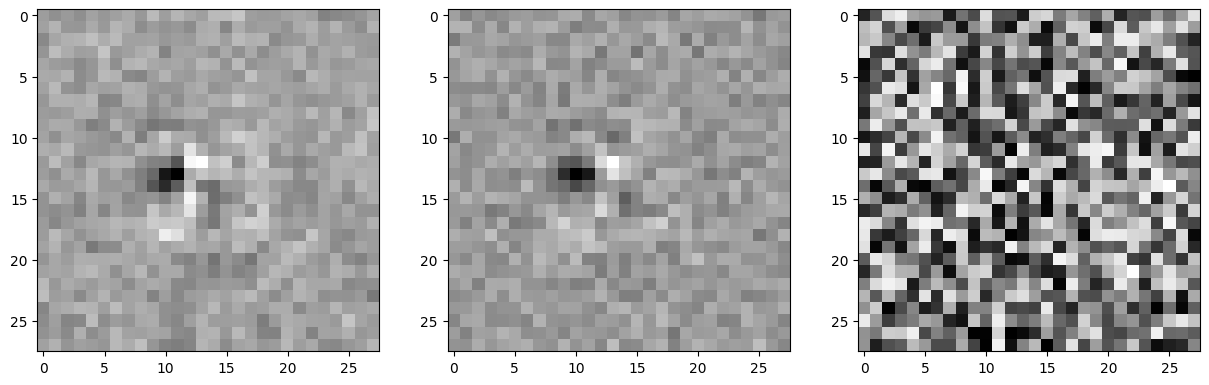

[ 0.257982   1.3872893 -1.1153139]


In [25]:
layers_weights = model.layers[1].weights[0].numpy()
neurons = layers_weights.shape[1]

for i in range(neurons):
    img = layers_weights[:, i]
    img.shape = (28, 28)
    plt.subplot(1, neurons, i+1)
    plt.imshow(img, cmap='gray')
plt.show()    
layers_weights = model.layers[2].weights[0].numpy()
print(layers_weights.flatten())


Результат є несподіванним для мене. Тут починає навчатися один нейрон, для якого вихідний нейрон і враховує результати - ігнорує інші нейрони.
Спробую йому допомогти...

The result is unexpected for me. Here, one neuron begins to learn, for which the output neuron takes into account the results - it ignores other neurons.
I will try to help him...

In [26]:
best_num = model.layers[2].weights[0].numpy().argmax()
weights = model.layers[1].weights[0].numpy()
biases = model.layers[1].weights[1].numpy()
# Хороший нейрон скопіюю до інших:
# I copy a good neuron to others:
tmp = weights[:, best_num]
weights[:, 0] = tmp
weights[:, 1] = tmp
weights[:, 2] = tmp
# Трохи "поламаю" зміщення:
# I "break" the displacement a little:
biases = biases*0.0 + 0.3

# Вихідний нейрон тепер повинен однаково оцінювати всі нейрони:
# The output neuron should now evaluate all neurons equally:
model.layers[1].set_weights([weights, biases])

weights = model.layers[2].weights[0].numpy()
biases = model.layers[2].weights[1].numpy()
weights = weights*0.0 + 0.3
model.layers[2].set_weights([weights, biases])

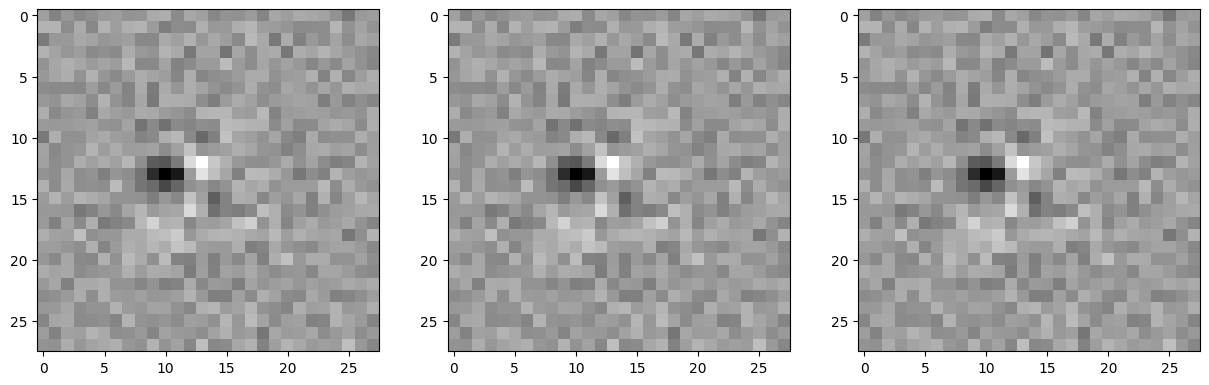

[0.3 0.3 0.3]


In [27]:
# Тепер все виглядає так:
# Now everything looks like this:
layers_weights = model.layers[1].weights[0].numpy()
neurons = layers_weights.shape[1]

for i in range(neurons):
    img = layers_weights[:, i]
    img.shape = (28, 28)
    plt.subplot(1, neurons, i+1)
    plt.imshow(img, cmap='gray')
plt.show()    
layers_weights = model.layers[2].weights[0].numpy()
print(layers_weights.flatten())

Epoch 1/60
70/70 [==============================] - 0s 4ms/step - loss: 0.0973
Epoch 2/60
70/70 [==============================] - 0s 4ms/step - loss: 0.0711
Epoch 3/60
70/70 [==============================] - 0s 4ms/step - loss: 0.0676
Epoch 4/60
70/70 [==============================] - 0s 4ms/step - loss: 0.0677
Epoch 5/60
70/70 [==============================] - 0s 4ms/step - loss: 0.0637
Epoch 6/60
70/70 [==============================] - 0s 4ms/step - loss: 0.0598
Epoch 7/60
70/70 [==============================] - 0s 4ms/step - loss: 0.0649
Epoch 8/60
70/70 [==============================] - 0s 4ms/step - loss: 0.0595
Epoch 9/60
70/70 [==============================] - 0s 4ms/step - loss: 0.0579
Epoch 10/60
70/70 [==============================] - 0s 4ms/step - loss: 0.0577
Epoch 11/60
70/70 [==============================] - 0s 4ms/step - loss: 0.0576
Epoch 12/60
70/70 [==============================] - 0s 4ms/step - loss: 0.0584
Epoch 13/60
70/70 [==============================

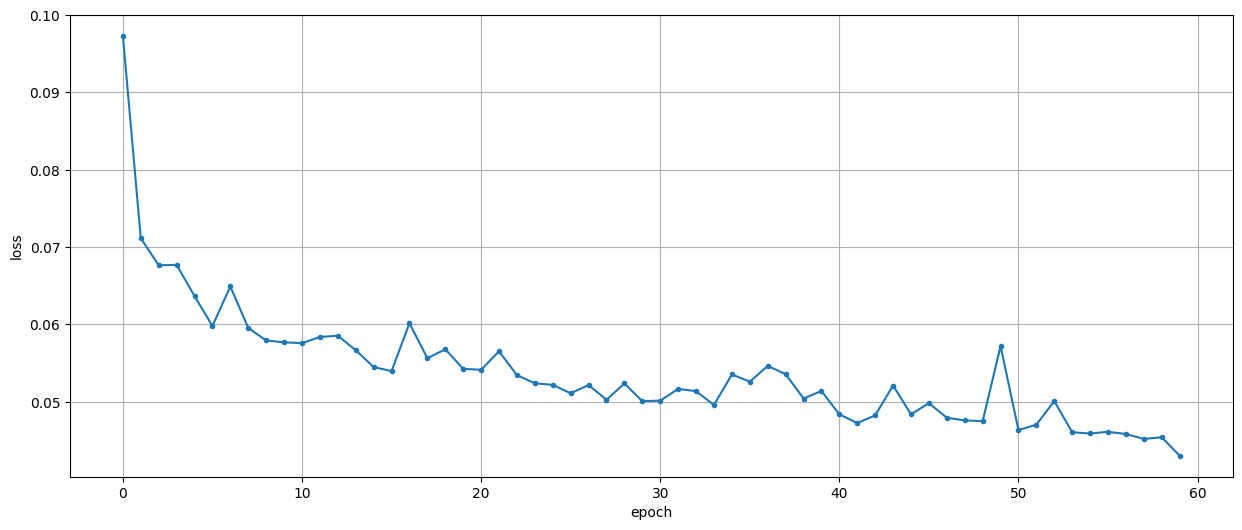

In [28]:
# Дотреную з врахуванням ручного налаштування:
# Adjust with manual setting:
history = model.fit(pixels, labels, epochs=60, batch_size=64)
epochs = range(len(history.history['loss']))
plt.plot(epochs, history.history['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')
plt.show()

In [29]:
# New accuracy score:
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1
acc3 = correct/len(labels)
print('Accuracy', acc3)

140/140 [==============================] - 0s 1ms/step
Accuracy 0.9722595078299776


In [30]:
print(f'Accuracy for one perceptron : {acc1}')
print(f'Accuracy for more perceptron: {acc2}')
print(f'Accuracy for manual tuning  : {acc3}')

Accuracy for one perceptron : 0.9664429530201343
Accuracy for more perceptron: 0.9277404921700224
Accuracy for manual tuning  : 0.9722595078299776


1) В процесі тренування показники покращувалися, але було й так, що втрати ставали більшими. Тому потрібно використати засоби відновлення найкращих вагів.
2) При копіюванні даних з кращого перцептрона, було б доречно трохи додати шумів.
3) Втручання при розподілі даних покращило ситуацію, але не думаю, що за пару десятих відсотки ця робота є доцільною. Краще перейти до спеціалізованих для зображення методів класифікації.
4) Мала кількість нейронів з використанням нелінійного активатора ReLU, не завжди дає вдале тренування. Пророкую, що про це буде п подальших лекціях.
5) Комбінація нейронів з лінійним активатором ефекту не дає - лінійна комбінація лінійних комбінацій є лінійною комбінацією.
### GoogleTranslate
1) In the process of training, the indicators improved, but it also happened that the losses became greater. Therefore, you need to use the best weight loss products.
2) When copying data from a better perceptron, it would be appropriate to add some noise.
3) Intervention in the distribution of data improved the situation, but I do not think that for a couple of tenths of a percent this work is appropriate. It is better to go to classification methods specialized for images.
4) A small number of neurons using the ReLU nonlinear activator does not always give successful training. I predict that this will be discussed in further lectures.
5) The combination of neurons with a linear activator has no effect - a linear combination of linear combinations is a linear combination.